In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [25]:
def deriv_I(d,alpha):
    beta = 0.5 
    Io = 100*(1-(beta+0.1))
    return -(Io*np.exp(-d/alpha))/alpha

def deriv_Ah(depth,h):
    A_max = 1e-2
    A_depth = 1e-4
    A_dip = 1.5e-3
    if depth < h:
        return A_max
    else:
        return  A_depth + (A_max-A_depth-A_dip*(depth-h))*np.exp(-0.5*(depth-h))
    #return A_depth + (A_max-A_depth-A_dip*(depth-h))*np.exp(-0.5*(depth-h))
    
def n_matrix(N,h):
    A_max = 1e-2
    A = np.zeros(shape=(N+1,N+1))
    T = np.zeros(N+1).reshape((N+1),1)
    F = np.zeros(N+1).reshape((N+1),1)
    
    #cdiff_coeff = [1.,-2,1.] #central diff approx
    #fdiff_coeff = [1,-1] #forward euler approx
    
    for i in range(1,N):
        z1 = deriv_Ah(i,h)+(A_max)/i
        z2 = deriv_Ah(i,h)+(2*A_max)/i
        z3 = A_max/i
        if i < h:
            A[i,i-1:3+(i-1)] = [A_max,-2*A_max,A_max]
        elif i >=h:
            A[i,i-1:3+(i-1)] = [z1,-z2,-z3]
        #A[i,i-1:len(cdiff_coeff)+(i-1)] = cdiff_coeff
    return A 


In [26]:
# upper mixing layer
# try putting both with a stencil change after h = 10 
N = 200
h = 10
A = n_matrix(N,h)

# Setting up initial conditions
A[0,0] = 1 
A[-1,-1] = 1 
A

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e-02, -2.00000000e-02,  1.00000000e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e-02, -2.00000000e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.01010101e-04, -5.05050505e-05,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.50251256e-04, -2.00502513e-04, -5.02512563e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [27]:
np.linalg.cond(A)

9154.814913092298

In [28]:
alpha = 10
cp = 4e6

T = np.zeros(N+1).reshape((N+1),1)
F = np.zeros(N+1).reshape((N+1),1)
F[0] = -1 
F[-1] = -2

for d in range(1,N):
    #if d < h:
        # f = (deriv_I(d,alpha)/(cp*deriv_Ah(d,h)))*d**2
        # f = 1/cp * deriv_I(d,alpha)
    #elif d>=h:
        # f = (deriv_I(d,alpha)/(cp*deriv_Ah(d,h)))*d
    F[d] = (1/cp * deriv_I(d,alpha))*d
    

In [29]:
T = np.linalg.solve(A,F)
len(T[:,0])
depth = np.arange(len(T[:,0]))

(-3.0, 1.0)

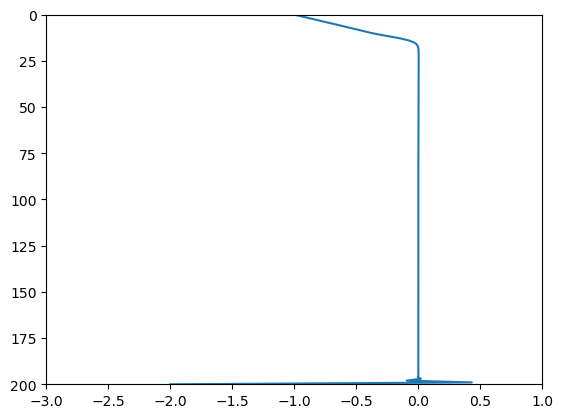

In [30]:
plt.plot(T,depth)
plt.ylim(200,0)
plt.xlim(-3,1)

# part 1

In [15]:
N = 200 
cp = 4e6
beta = 0.5
alpha = 10
h = 10 
params = {'beta':0.5,
          'alpha':10,
          'h':10}

A,T,F = setup_matrices(N)

In [16]:
A

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

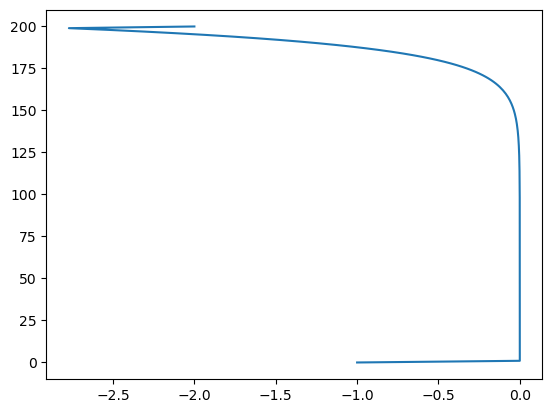

In [22]:
plt.plot(F,np.arange(N+1))

In [23]:
T = np.linalg.inv(A)*F

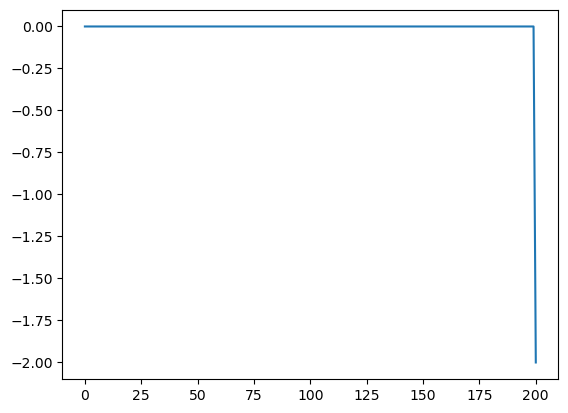

In [33]:
plt.plot(T[-1,:])

In [ ]:
cp = 4e6
beta = 0.5
alpha = 10
height = 10
d_end = 200

#initial conditions 
I = 100*beta 
T0 = -1 
Tend = -2 

depthVec = np.arange(d_end)

for i in range(depthVec):
    
